In [10]:
import warnings
warnings.filterwarnings("ignore")
!pip install yfinance
!pip install pyfolio
import pandas as pd
import numpy as np
import yfinance as yf
import pyfolio as pf
import datetime as dt
import matplotlib.pyplot as plt


In [33]:
activos = ['AAPL','XOM','PG','V','AMZN','FB','BRK-B']
fechas = ['2019-8-24', '2020-8-24']
stock = pd.DataFrame()
for activo in activos:
    stock[activo] = yf.Ticker(activo).history(period='1d', start=fechas[0], end=fechas[1])['Close']
stock
rt= np.log(stock/stock.shift(1))

#PRECIO Y RETORNO BENCHMARK
sp=['^GSPC']
ben = pd.DataFrame()
for activo in sp:
    ben[activo] = yf.Ticker(activo).history(period='1d', start=fechas[0], end=fechas[1])['Close']
ben
rtb=np.log(ben/ben.shift(1))


In [34]:

def get_feasible_solution(size):
    W=np.zeros((size,len(activos)))
    for i in range(size):
        weights = np.random.random(len(activos))
        weights /= np.sum(weights)
        W[i]=weights
    return (W)


#Función objetivo:
def OF(W):
    rf=0.0208
    rp= np.sum( (rt.mean() * W * 252)) 
    vol= np.sqrt(np.dot(W.T, np.dot(rt.cov()*252, W)))
    rb= np.sum( (rtb.mean() * 252)) 
    port_rt=pd.DataFrame((rt*W).sum(axis=1))
    port_rt['sp']=rtb
    cov=(port_rt[1:].cov()).iloc[0,1]
    var_b=np.var(rt)

    sharpe= (rp-rf)/vol
    alfa=rp-rb
    beta=cov/var_b

    return (sharpe+alfa-abs(beta))    

   

In [27]:
def union(padre1, padre2):
    sol1 = padre1[0]
    sol2 = padre2[0]
    
    # Definir como se hará la unión
    #LA UNION LA HARÁ ANDREA
    #
    
    return ("Aqui debe ir la lista de ponderaciones", OF((n_media,n_desv)))
    

def mutate(solucion):
    sol = solucion[0]
    
    # Definir como se hará la mutación
    
    return ("Aqui debe ir la lista de ponderaciones", OF((n_media,n_desv)))

In [10]:
def initialPopulation(population):
    pop=[]
    for ind in range(population):
        sol = get_feasible_solution()
        pop.append((sol, OF(sol)))
    return pop

def sortGeneration(population):
    """
    Sort population by OF.
    """
    if  population==[]: 
        return []
    else:
        # para maximizar
        pivot = population[0]
        bads = sortGeneration([ind for ind in population[1:] if ind[1] < pivot[1]])
        goods = sortGeneration([ind for ind in population[1:] if ind[1] >= pivot[1]])
        return goods + [pivot] + bads
        
        # para minimizar
        # pivot = population[0]
        # bads = sortGeneration([ind for ind in population[1:] if ind[1] > pivot[1]])
        # goods = sortGeneration([ind for ind in population[1:] if ind[1] <= pivot[1]])
        # return goods + [pivot] + bads
    
    

def selectTournament(population):
    pop_size = max([2, int(0.1 * population)])
    group1 = np.random.choice(a = range(population), size = pop_size, replace = False) # 3,7,8,20,25,60
    group2 = np.random.choice(a = range(population), size = pop_size, replace = False) # 9,0
    return (min(group1), min(group2))

def GA(generations, population, n_children, p_mutation):
    """
    Genetic algorithm search
    """

    pop = initialPopulation(population)
    overall_best = []
    generation = 1
    while generation <= generations:
        children = []
        pop = sortGeneration(pop)
        overall_best.append(pop[0][1])
        for aux in range(n_children):                
            pos = selectTournament(population)
            parent1 = pop[pos[0]]
            parent2 = pop[pos[1]]
            
            child = union(parent1, parent2)

            if np.random.rand() <= p_mutation:
                child = mutate(child)
            children.append(child)
        pop = pop[:(population - n_children)] + children
        generation += 1

    pop = sortGeneration(pop)
    overall_best.append(pop[0][1])
    best_config_found = pop[0][0]
    best_OF_found = OF(best_config_found)
    return {'best_w':best_config_found, 'best_fo':best_OF_found,'overall_best':overall_best}

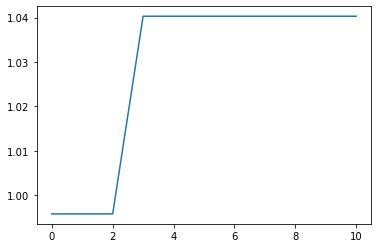

In [11]:
Example = GA(10, 100, 40, 0.05)
plt.plot(Example['overall_best'])
plt.show()

# Backtesting